## Analysis of the data

In [21]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# preview analysis of how much data for year we have per aggregated files and count files

import os

# Specify the folder path
folder_path = 'debit_circulation_quebec'  
# Get the list of subdirectories
subfolders = next(os.walk(folder_path))[1]

# Print the number of subfolders
print(f"The folder '{folder_path}' contains {len(subfolders)} subfolders.")



The folder 'debit_circulation_quebec' contains 4890 subfolders.


In [3]:
import os

# Specify the folder path
folder_path = 'debit_circulation_quebec'
# Get the list of subdirectories
subfolders = next(os.walk(folder_path))[1]

# Initialize counters
aggregated_folder_count = 0
count_folder_count = 0

# Iterate over subfolders
for subfolder in subfolders:
    # Get the list of files in the subfolder
    files = os.listdir(os.path.join(folder_path, subfolder))
    
    # Check if the subfolder contains aggregated files
    aggregated_files_present = any(file.startswith(subfolder) and '_' in file for file in files)
    
    # Check if the subfolder contains count files
    count_files_present = any(file.startswith(subfolder) and '-' in file and 'donnees' in file for file in files)
    
    # Increment counters
    if aggregated_files_present:
        aggregated_folder_count += 1
    if count_files_present:
        count_folder_count += 1

# Print the counts
print(f"Number of subfolders with aggregated files: {aggregated_folder_count}")
print(f"Number of subfolders with count files: {count_folder_count}")


Number of subfolders with aggregated files: 650
Number of subfolders with count files: 4852


> So the results shows that we have sections with only subdolders of count files (données)

In [11]:
# number of aggregated files and count files

# Initialize counters
aggregated_file_count = 0
count_file_count = 0

# Iterate over subfolders
for subfolder in subfolders:
    # Get the list of files in the subfolder
    files = os.listdir(os.path.join(folder_path, subfolder))
    
    # Iterate over files in the subfolder
    for file in files:
        # Check if it's an aggregated file
        if file.startswith(subfolder) and '_' in file:
            aggregated_file_count += 1
        # Check if it's a count file
        if file.startswith(subfolder) and '-' in file and 'donnees' in file:
            count_file_count += 1

# Print the counts
print(f"Total number of aggregated files: {aggregated_file_count}")
print(f"Total number of count files: {count_file_count}")

Total number of aggregated files: 3963
Total number of count files: 10441


In [12]:
# Initialize dictionaries to store the counts per year
aggregated_files_per_year = {}
count_files_per_year = {}

# Iterate over subfolders
for subfolder in subfolders:
    # Get the list of files in the subfolder
    files = os.listdir(os.path.join(folder_path, subfolder))
    
    # Iterate over files in the subfolder
    for file in files:
        # Check if it's an aggregated file
        if file.startswith(subfolder) and '_' in file:
            year = file.split('_')[-1].split('.')[0]
            if year in aggregated_files_per_year:
                aggregated_files_per_year[year] += 1
            else:
                aggregated_files_per_year[year] = 1
        # Check if it's a count file
        if file.startswith(subfolder) and '-' in file and 'donnees' in file:
            year = file.split('-')[-2]
            if year in count_files_per_year:
                count_files_per_year[year] += 1
            else:
                count_files_per_year[year] = 1

# Print the counts per year for aggregated files
print("Aggregated Files per Year:")
for year, count in sorted(aggregated_files_per_year.items()):
    print(f"Year {year}: {count}")

# Print the counts per year for count files
print("Count Files per Year:")
for year, count in sorted(count_files_per_year.items()):
    print(f"Year {year}: {count}")


Aggregated Files per Year:
Year 2014: 359
Year 2015: 426
Year 2016: 454
Year 2017: 479
Year 2018: 484
Year 2019: 518
Year 2020: 485
Year 2021: 466
Year 2022: 292
Count Files per Year:
Year 2018: 2369
Year 2019: 2395
Year 2020: 1767
Year 2021: 1961
Year 2022: 1949


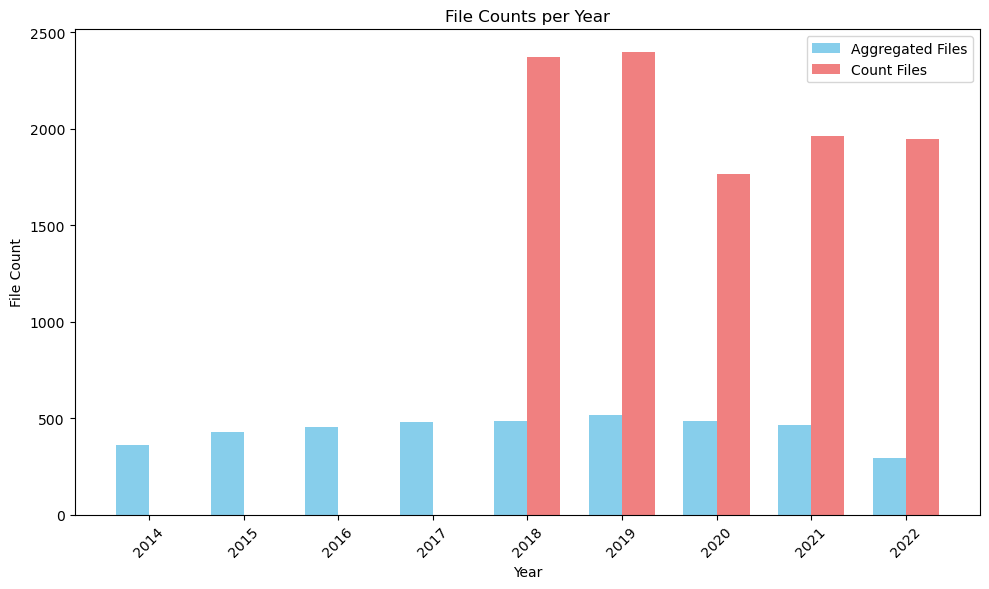

In [22]:
# Extract years and corresponding counts
years = sorted(set(aggregated_files_per_year.keys()) | set(count_files_per_year.keys()))
aggregated_counts = [aggregated_files_per_year.get(year, 0) for year in years]
count_counts = [count_files_per_year.get(year, 0) for year in years]

# width of the bars
bar_width = 0.35

# Generate the x-axis positions for the bars
x = np.arange(len(years))

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, aggregated_counts, width=bar_width, color='skyblue', label='Aggregated Files')
plt.bar(x + bar_width/2, count_counts, width=bar_width, color='lightcoral', label='Count Files')
plt.xlabel('Year')
plt.ylabel('File Count')
plt.title('File Counts per Year')
plt.xticks(x, years, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#example of analysis using the folders